In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("../data/train.csv")

In [3]:
import sys
sys.path.insert(0,"../libs/")

In [4]:
from datetime import datetime
train["time_stamp"] = train.DateTime.apply(lambda string_date:datetime.strptime(string_date, "%Y-%m-%d %H:%M:%S") )

In [5]:
from data_cleaning import age2day
train["age_in_days"] = train.AgeuponOutcome.apply(age2day)
train["age_in_years"] = train.age_in_days/365.

In [65]:
def hist_df_column(df,column_name,normed=True,bins=50):
    fig = plt.figure()
    ax  = fig.add_subplot(111)

    ax.set_xlabel(column_name,fontsize=14)
    ax.set_ylabel("percentage",fontsize=14)
    
    hist_data = ax.hist( df[column_name].dropna().values
        ,normed=normed,bins=bins )
    fig.tight_layout()
    return fig,ax
# end def

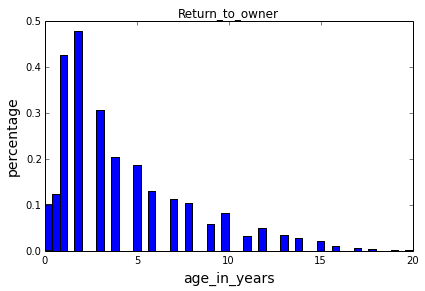

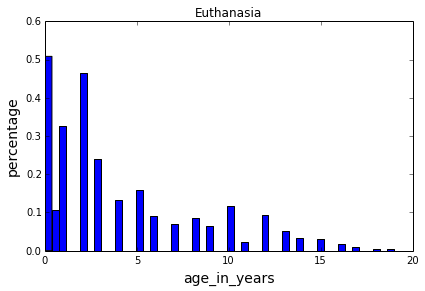

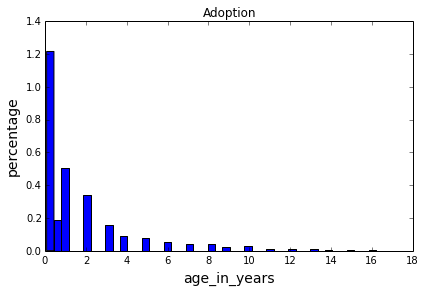

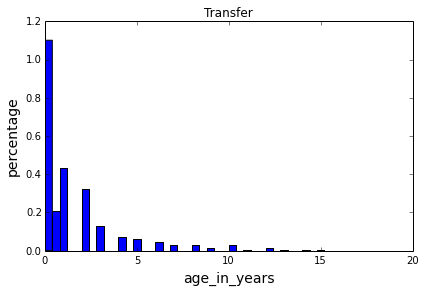

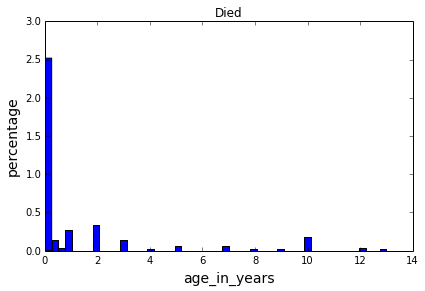

In [67]:
for outcome in train.OutcomeType.unique():
    mydf = train[train.OutcomeType==outcome]
    fig,ax = hist_df_column(mydf,"age_in_years")
    ax.set_title(outcome)